# Applied Machine Learning:  A simple classification task



### Import required modules and load data file

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Again, to access the file, you need to mount the drive.
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
fruits = pd.read_csv('data/fruit_data_with_colors.csv', sep='\t')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
fruits.shape

(59, 7)

The file contains 59 instances of fruit. It has the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

Let's take a more in depth look at the data itself before we proceed with giving it to a machine learning algorithm.

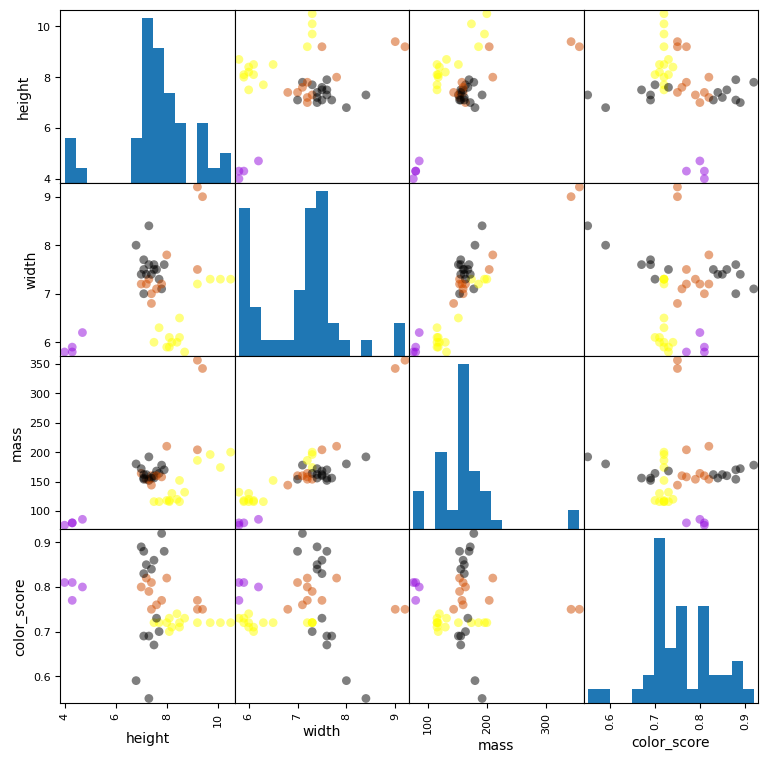

In [5]:
# plotting a scatter matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, alpha=0.5, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [6]:
print(X_train.shape)
print(X_test.shape)

(44, 4)
(15, 4)


Now that we understand the data a little better, let's create a training and a test set to feed into our classifier.



### Create train-test split

To create training and test sets from a input dataset, Scikit-learn provides a handy function that will do this split for us, called, not surprisingly, `train_test_split()`. This function randomly shuffles the dataset and splits off a certain percentage of the input samples for use as a training set, and then puts the remaining samples into a different variable for use as a test set.

So in this example, we're using a 75-25% split of training versus test data. That's a pretty standard relative split and a good rule of thumb to use in deciding what proportion of training versus testing.

As a reminder, when we're using Scikit-learn, we'll denote the data that we have using different flavors of the variable `X`, capital X, which is typically a two dimensional array or dataframe. While the notation we'll use for labels will be typically based on lowercase `y`, which is usually a one dimensional array, or a scalar.

Finally, note the use of the `random_state` parameter in the `train_test_split()` function. This `random_state` parameter provides a seed value to the function's internal random number generator. This is to check and validate the data when running the code multiple times. Setting `random_state` to a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.


In [7]:
from sklearn.model_selection import train_test_split

X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
X_train.shape

(44, 4)

### Create classifier object

Once we have our train-test split, we then need to create an instance of the classifier object, which is a k-NN classifier in our case. We also need to set the important parameter, the number of neighbors, to a specific value to be used by the classifier.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

### Train the classifier (fit the estimator) using the training data

We then train the classifier by passing in the training set data in `X_train`, and the labels in `y_train` to the classifier's `fit` method.

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

Now that we've "trained" our classifier, one simple way to assess if the classifier is likely to be good at predicting the label of future, previously unseen data instances, is to compute the classifier's accuracy on the test set data items. Remember, that the k-NN classifier did not see any of the fruits in the test set during the training phase.

To do this we use the `.score()` method for the classifier object. This will take the test set points as input and compute the **accuracy**. The accuracy is defined as the **fraction of test set items, whose true label was correctly predicted by the classifier**.

In [ ]:
knn.score(X_test, y_test)

### Use the trained k-NN classifier model to classify / predict new, previously unseen objects

We can also use our new classifier to classify individual instances of a fruit using the KNN `.predict()` function.

In [ ]:
# define a dictionary that maps a numeric fruit label value to a fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

In [ ]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm, color score 0.8
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.8]])
print(fruit_prediction)
print(lookup_fruit_name[fruit_prediction[0]])

In [ ]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm, color score 0.73
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.73]])
print(lookup_fruit_name[fruit_prediction[0]])

### Plot the decision boundaries of the k-NN classifier

I retreived the following customized function `plot_fruit_knn()` from StackOverflow, that basically takes the X and y training values as parameters, as well as the k size and the weight and produces the colored plots I showed you earlier that have the decision boundaries.

You can then try out different values of k for yourself to see what the effect is on the decision boundaries.

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()


The last parameter passed respresents the weighting method. So here I'm passing in the string "uniform", which indicates to treat all neighbours equally when combining their labels.

Try changing this to the word "distance", if you want to try a distance wave method; i.e. closer neighbors of a query point will have a greater influence than neighbors which are further away.

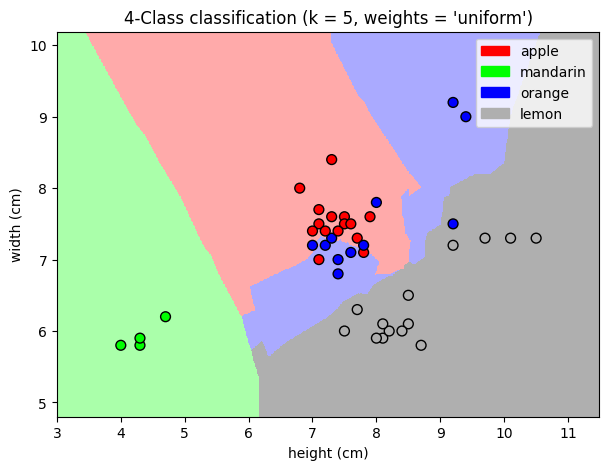

In [31]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')  # we choose 5 nearest neighbors

###How do the boundaries evolve with the change of our choice of the 'k' parameter?

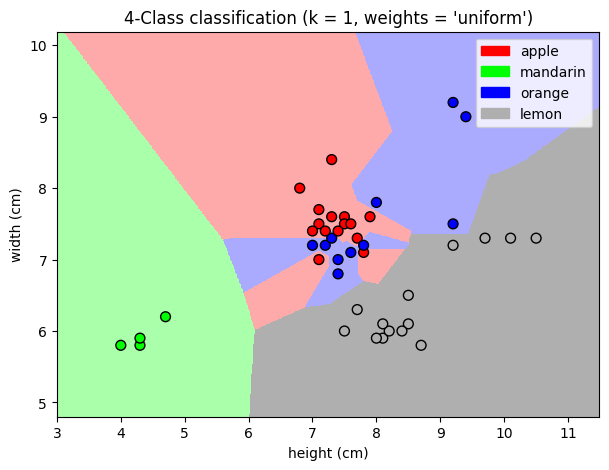

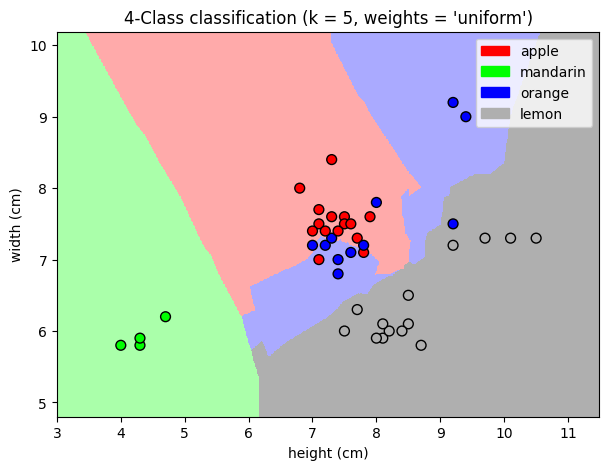

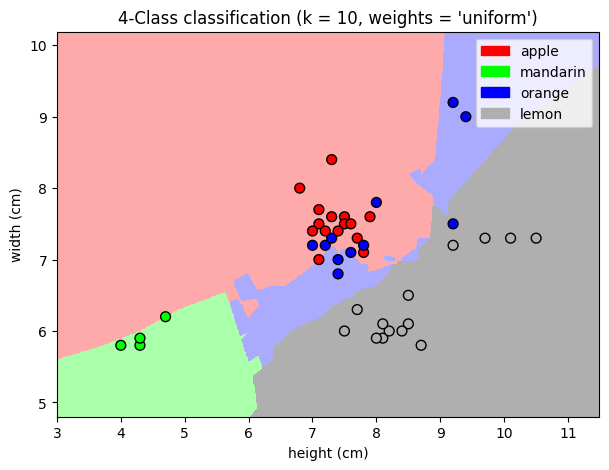

In [30]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')
plot_fruit_knn(X_train, y_train, 5, 'uniform')
plot_fruit_knn(X_train, y_train, 10, 'uniform')

So in this series of plots, we can see the different decision boundaries that are produced as k is varied from one to five to ten. We can see that when k has a small value like 1, the classifier is good at learning the classes for individual points in the training set, but with decision boundaries that are fragmented with considerable variation. This is because *when k = 1, the prediction is sensitive to noise, outliers, mislabeled data, and other sources of variation in individual data points.*

For larger values of k, the areas assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points, but possibly with more mistakes in individual points. This is an example of what's known as the "bias-variance tradeoff".



### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

Given the changes in the classifier's decision boundaries we observed that when we changed k, the next natural question might be how the value or our choice of k affects the accuracy of the classifier. *What's the most ideal k value?*

We can plot the accuracy as a function of k very easily using the below short snippet of code. We see that, indeed, larger values of k do lead to worse accuracy for this particular dataset and fixed single `train_test_split()`. Note though, that this isn't particularly the case in general, a low value k is usually more likely to overfit the data, and thus could lead to lower accuracy.



In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In general, the best choice of the value of k is the one that leads to the highest accuracy. This can vary greatly depending on the data set.

### How sensitive is k-NN classification accuracy to the train/test split proportion?

Keep in mind though, these results are only for this particular training-test split: 75% training and 25% testing. To get a more reliable estimate of likely future accuracy for a particular value of k, we would want to look at results over multiple possible train test splits.

Below is a snippet of code that plots the accuracy of the different training and test cut off decisions. In this scenario, we can see that the more training we give it the more accurate the results are.

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

So we've taken several steps so far. We've looked at a data set, plotted some features. We then took the features and learned how to compute a train-test split and used that to train a classifier and finally used the resulting classifier to make some predictions for new objects. So congratulations, you've just created and run your first machine learning application in Python!!

In the next class, we'll go into some supervised learning methods in more depth, and look beyond k-nearest neighbors to learn how and why to apply other types of classifiers to machine learning problems.